### Import Libraries and Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from transformers import pipeline
from datasets import load_dataset
from sklearn.metrics import accuracy_score, f1_score, ConfusionMatrixDisplay

In [2]:
dataset = load_dataset(
    "csv",
    data_files={
        "train": "Datasets/TrainSentiment.csv",
        "validation": "Datasets/ValidationSentiment.csv",
        "test": "Datasets/TestSentiment.csv"
    },
)
dataset

DatasetDict({
    train: Dataset({
        features: ['sentence', 'label'],
        num_rows: 41120
    })
    validation: Dataset({
        features: ['sentence', 'label'],
        num_rows: 17879
    })
    test: Dataset({
        features: ['sentence', 'label'],
        num_rows: 596
    })
})

In [3]:
def get_label(d):
    return int(d['label'].split('_')[1])

### ALBERT

In [4]:
model1 = pipeline(
    "text-classification",
    model="ClassifierModels/ALBERT",
    device=0,
)

In [5]:
test_pred1 = model1(dataset['test']['sentence'])
test_pred1 = [get_label(d) for d in test_pred1]

accuracy:  0.9043624161073825
f1-score:  0.8911319546813417


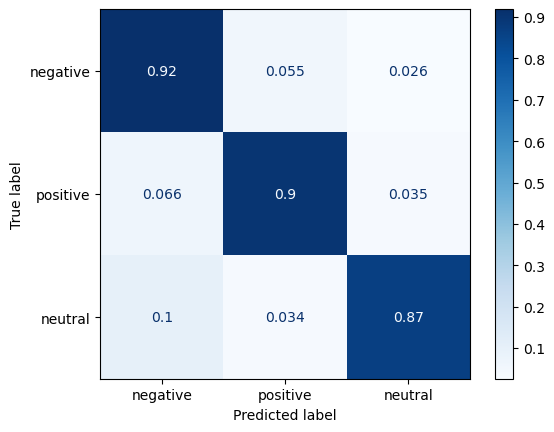

In [6]:
print("accuracy: ", accuracy_score(dataset['test']['label'], test_pred1))
print("f1-score: ", f1_score(dataset['test']['label'], test_pred1, average='macro'))

ConfusionMatrixDisplay.from_predictions(
    dataset["test"]["label"], test_pred1,
    normalize="true",
    display_labels=["negative", "positive", "neutral"],
    cmap="Blues",
)

### BERT

In [7]:
model2 = pipeline(
    "text-classification",
    model="ClassifierModels/BERT",
    device=0,
)

In [8]:
test_pred2 = model2(dataset['test']['sentence'])
test_pred2 = [get_label(d) for d in test_pred2]

accuracy:  0.9714765100671141
f1-score:  0.9655578971002267


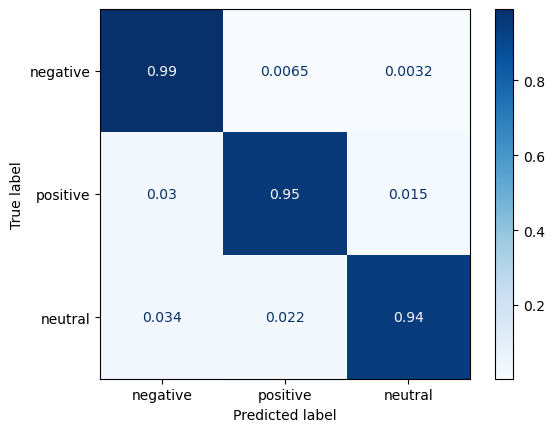

In [9]:
print("accuracy: ", accuracy_score(dataset['test']['label'], test_pred2))
print("f1-score: ", f1_score(dataset['test']['label'], test_pred2, average='macro'))

ConfusionMatrixDisplay.from_predictions(
    dataset["test"]["label"], test_pred2,
    normalize="true",
    display_labels=["negative", "positive", "neutral"],
    cmap="Blues",
)

### DistilBERT

In [10]:
model3 = pipeline(
    "text-classification",
    model="ClassifierModels/DistilBERT",
    device=0,
)

In [11]:
test_pred3 = model3(dataset['test']['sentence'])
test_pred3 = [get_label(d) for d in test_pred3]

accuracy:  0.889261744966443
f1-score:  0.8730710801290051


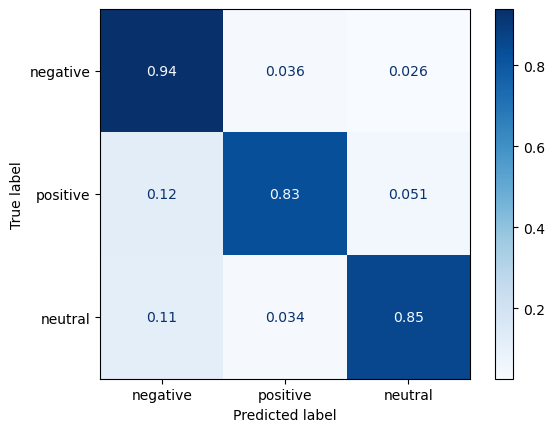

In [12]:
print("accuracy: ", accuracy_score(dataset['test']['label'], test_pred3))
print("f1-score: ", f1_score(dataset['test']['label'], test_pred3, average='macro'))

ConfusionMatrixDisplay.from_predictions(
    dataset["test"]["label"], test_pred3,
    normalize="true",
    display_labels=["negative", "positive", "neutral"],
    cmap="Blues",
)

### RoBERTa

In [13]:
model4 = pipeline(
    "text-classification",
    model="ClassifierModels/RoBERTa",
    device=0,
)

In [14]:
test_pred4 = model4(dataset['test']['sentence'])
test_pred4 = [get_label(d) for d in test_pred4]

accuracy:  0.9060402684563759
f1-score:  0.8942234383347397


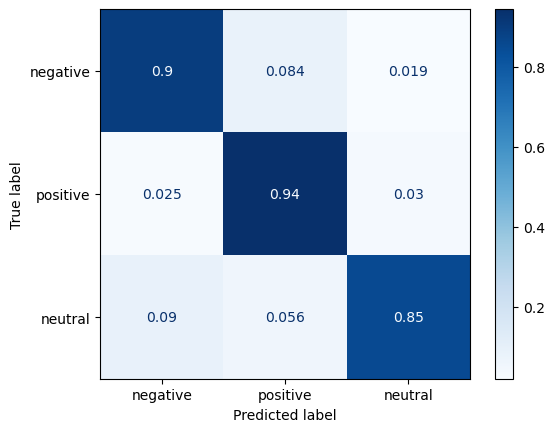

In [15]:
print("accuracy: ", accuracy_score(dataset['test']['label'], test_pred4))
print("f1-score: ", f1_score(dataset['test']['label'], test_pred4, average='macro'))

ConfusionMatrixDisplay.from_predictions(
    dataset["test"]["label"], test_pred4,
    normalize="true",
    display_labels=["negative", "positive", "neutral"],
    cmap="Blues",
)